In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

%matplotlib inline

In [3]:
data_dir = './datasets/tk_photos'
data_dir

'./datasets/tk_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/tk_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka0000.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00000.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00001.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00002.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00003.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00004.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00005.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00006.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00007.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00008.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00009.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka0001.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00010.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00011.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00012.JPG'

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3839

In [8]:
fifty_tk = list(data_dir.glob('Fifty_Taka/*'))
fifty_tk[:5]

[WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka0000.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00000.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00001.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00002.JPG'),
 WindowsPath('datasets/tk_photos/Fifty_Taka/Fifty_Taka00003.JPG')]

In [9]:
len(fifty_tk)

471

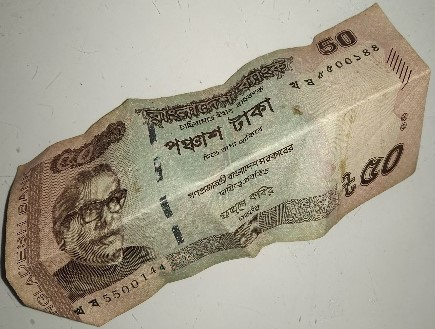

In [10]:
PIL.Image.open(str(fifty_tk[1]))

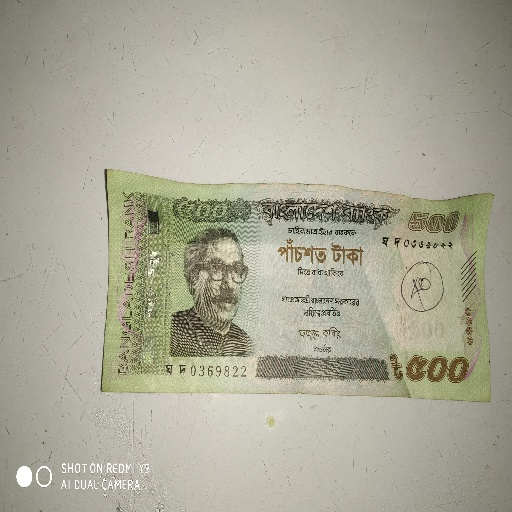

In [11]:
five_hundred_tk = list(data_dir.glob('Five_Hundred_Taka/*'))
PIL.Image.open(str(five_hundred_tk[0]))

In [12]:
## Creating a dictionary of different notes and all the image paths assocaited with it

tk_images_dict = {
    'fifty_tk': list(data_dir.glob('Fifty_Taka/*')),
    'five_coin': list(data_dir.glob('Five_Coin/*')),
    'five_hundred_tk': list(data_dir.glob('Five_Hundred_Taka/*')),
    'five_tk': list(data_dir.glob('Five_Taka/*')),
    'one_coin': list(data_dir.glob('One_Coin/*')),
    'one_hundred_tk': list(data_dir.glob('One_Hundred_Taka/*')),
    'one_tk': list(data_dir.glob('One_Taka/*')),
    'one_thousand_tk': list(data_dir.glob('One_Thousand_Taka/*')),
    'ten_tk': list(data_dir.glob('Ten_Taka/*')),
    'twenty_tk': list(data_dir.glob('Twenty_Taka/*')),
    'two_coin': list(data_dir.glob('Two_Coin/*')),
    'two_tk': list(data_dir.glob('Two_Taka/*')),
}

In [15]:
#tk_images_dict['ten_tk']

In [14]:
len(tk_images_dict['ten_tk'])

629

In [24]:
#labels dictionary

tk_labels_dict = {
    'fifty_tk': 0,
    'five_coin': 1,
    'five_hundred_tk': 2,
    'five_tk': 3,
    'one_coin': 4,
    'one_hundred_tk': 5,
    'one_tk': 6,
    'one_thousand_tk': 7,
    'ten_tk': 8,
    'twenty_tk': 9,
    'two_coin': 10,
    'two_tk': 11,
}

In [18]:
str(tk_images_dict['ten_tk'][1])

'datasets\\tk_photos\\Ten_Taka\\Ten_Taka0001.JPG'

In [20]:
#read this image file into opencv object
#supply file path, it will return numpy array

img = cv2.imread(str(tk_images_dict['ten_tk'][1]))
img

array([[[104, 124, 119],
        [101, 121, 116],
        [102, 122, 117],
        ...,
        [ 85, 104, 101],
        [ 83, 102,  99],
        [ 82, 101,  98]],

       [[100, 120, 115],
        [ 98, 118, 113],
        [101, 121, 116],
        ...,
        [ 85, 104, 101],
        [ 83, 102,  99],
        [ 82, 101,  98]],

       [[101, 121, 116],
        [ 99, 119, 114],
        [102, 122, 117],
        ...,
        [ 84, 103, 100],
        [ 83, 102,  99],
        [ 82, 101,  98]],

       ...,

       [[ 96, 115, 112],
        [ 97, 116, 113],
        [ 95, 114, 111],
        ...,
        [ 80,  97,  93],
        [ 79,  96,  92],
        [ 79,  96,  92]],

       [[ 94, 113, 110],
        [ 95, 114, 111],
        [ 94, 113, 110],
        ...,
        [ 80,  97,  93],
        [ 79,  96,  92],
        [ 79,  96,  92]],

       [[ 93, 112, 109],
        [ 95, 114, 111],
        [ 94, 113, 110],
        ...,
        [ 78,  95,  91],
        [ 78,  95,  91],
        [ 78,  95,  91]]

In [21]:
img.shape

(512, 512, 3)

In [22]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [25]:
X, y = [], []

for tk_name, images in tk_images_dict.items():
    print(tk_name)
    print(len(images))

for tk_name, images in tk_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180, 180))
        X.append(resized_image)
        y.append(tk_labels_dict[tk_name])


fifty_tk
471
five_coin
6
five_hundred_tk
499
five_tk
330
one_coin
4
one_hundred_tk
854
one_tk
8
one_thousand_tk
141
ten_tk
629
twenty_tk
527
two_coin
5
two_tk
356


In [27]:
y[1000:1010] #labels

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [28]:
X[:2]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [146, 157, 165],
         [138, 149, 157],
         [146, 157, 165]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [146, 157, 165],
         [144, 155, 163],
         [147, 158, 166]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [146, 157, 165],
         [143, 154, 162],
         [144, 155, 163]],
 
        ...,
 
        [[ 89, 126, 110],
         [ 92, 129, 113],
         [ 87, 125, 108],
         ...,
         [ 59,  76,  73],
         [ 57,  74,  71],
         [ 55,  72,  69]],
 
        [[ 88, 124, 109],
         [ 91, 128, 112],
         [ 89, 126, 109],
         ...,
         [ 60,  77,  74],
         [ 57,  74,  71],
         [ 56,  73,  70]],
 
        [[ 86, 123, 106],
         [ 91, 128, 112],
         [ 88, 125, 109],
         ...,
         [ 55,  71,  69],
  

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
len(X_train)

2872

In [32]:
len(X_test)

958

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
X_train_scaled[0]

array([[[0.30196078, 0.30980392, 0.35294118],
        [0.32156863, 0.33333333, 0.37647059],
        [0.25490196, 0.27058824, 0.31372549],
        ...,
        [0.28627451, 0.26666667, 0.29411765],
        [0.34509804, 0.34117647, 0.35686275],
        [0.30196078, 0.30588235, 0.31372549]],

       [[0.25490196, 0.27843137, 0.29803922],
        [0.23921569, 0.2627451 , 0.29019608],
        [0.24705882, 0.27058824, 0.29803922],
        ...,
        [0.3372549 , 0.33333333, 0.34509804],
        [0.35686275, 0.35294118, 0.36078431],
        [0.29803922, 0.29411765, 0.30588235]],

       [[0.25098039, 0.25882353, 0.29411765],
        [0.26666667, 0.27843137, 0.30980392],
        [0.25882353, 0.27058824, 0.29411765],
        ...,
        [0.28235294, 0.28627451, 0.2745098 ],
        [0.30980392, 0.30196078, 0.29803922],
        [0.28235294, 0.28235294, 0.28235294]],

       ...,

       [[0.14117647, 0.14117647, 0.18823529],
        [0.11372549, 0.11372549, 0.16078431],
        [0.08235294, 0

In [35]:
num_classes = 12

#layers.Conv2d(16 filters, filter size(3x3), padding, activation function )
cnn = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    #Dense network
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

cnn.compile(optimizer = 'adam',
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics = ['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
90/90 [==============================] - 78s 570ms/step - loss: 1.6502 - accuracy: 0.4123
Epoch 2/30
90/90 [==============================] - 50s 558ms/step - loss: 1.2235 - accuracy: 0.5776
Epoch 3/30
90/90 [==============================] - 50s 560ms/step - loss: 0.9775 - accuracy: 0.6602
Epoch 4/30
90/90 [==============================] - 50s 559ms/step - loss: 0.7851 - accuracy: 0.7329
Epoch 5/30
90/90 [==============================] - 51s 563ms/step - loss: 0.6244 - accuracy: 0.7880
Epoch 6/30
90/90 [==============================] - 51s 564ms/step - loss: 0.4884 - accuracy: 0.8374
Epoch 7/30
90/90 [==============================] - 51s 565ms/step - loss: 0.3287 - accuracy: 0.8903
Epoch 8/30
90/90 [==============================] - 51s 566ms/step - loss: 0.2726 - accuracy: 0.9130
Epoch 9/30
90/90 [==============================] - 52s 581ms/step - loss: 0.1797 - accuracy: 0.9457
Epoch 10/30
90/90 [==============================] - 50s 561ms/step - loss: 0.1280 - accura

In [36]:
cnn.evaluate(X_test_scaled, y_test)

30/30 [==============================] - 6s 178ms/step - loss: 2.8989 - accuracy: 0.6701


[2.8988699913024902, 0.6701461672782898]

In [37]:
predictions = cnn.predict(X_test_scaled)
predictions

30/30 [==============================] - 7s 182ms/step


array([[ -0.84020644, -18.058279  ,   2.933611  , ...,  10.457537  ,
        -23.149775  ,   3.914327  ],
       [  6.9870176 , -13.260084  , -11.464017  , ..., -28.807138  ,
         -1.6566731 , -24.45658   ],
       [ -7.8956976 , -11.132563  ,  16.598148  , ...,  -3.7648773 ,
         -1.1513482 ,  -7.102843  ],
       ...,
       [  0.45882767,  -0.24518369,   0.46321303, ...,  -6.6797605 ,
          4.212111  ,  -8.043149  ],
       [  1.2887807 ,  -6.794936  , -13.464379  , ...,  -8.091929  ,
        -34.325165  ,  14.030004  ],
       [ -7.5848613 ,  -4.48785   ,  11.079711  , ...,   2.559721  ,
         -5.9623437 ,  -0.14900544]], dtype=float32)

In [45]:
#convert the numpy array into set of probability 0 to 1

score = tf.nn.softmax(predictions[1])
score


<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([1.09367291e-24, 1.76069144e-33, 1.06097446e-32, 7.20206287e-33,
       0.00000000e+00, 0.00000000e+00, 2.87173211e-32, 2.55116951e-19,
       1.00000000e+00, 0.00000000e+00, 1.92743470e-28, 2.41605744e-38],
      dtype=float32)>

In [46]:
np.argmax(score)

#8 is ten-tk

8

In [47]:
y_test[1]

8

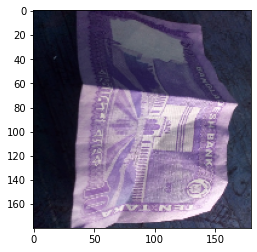

In [48]:
plt.imshow(X_test_scaled[1])

In [49]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

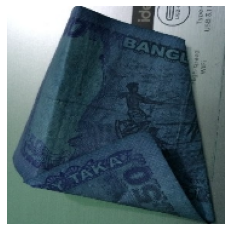

In [50]:
plt.axis('off')
plt.imshow(X[0])

In [51]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[173.62164 , 187.10162 , 184.46107 ],
        [175.23264 , 188.04767 , 184.7259  ],
        [174.8362  , 186.87401 , 183.75716 ],
        ...,
        [ 35.79282 ,  60.731445,  82.5213  ],
        [ 35.2269  ,  60.382446,  82.87526 ],
        [ 35.766125,  61.506115,  84.07779 ]],

       [[172.1821  , 185.25098 , 182.34982 ],
        [173.32304 , 185.75676 , 182.31174 ],
        [172.83595 , 184.25342 , 181.68216 ],
        ...,
        [ 34.76932 ,  59.058514,  80.01377 ],
        [ 33.6084  ,  57.952755,  79.111374],
        [ 35.043964,  60.02559 ,  81.29665 ]],

       [[171.54663 , 184.0777  , 181.82846 ],
        [171.2136  , 183.45886 , 180.74066 ],
        [171.37462 , 183.67184 , 181.22969 ],
        ...,
        [ 32.674274,  56.060417,  74.31078 ],
        [ 28.651258,  53.559296,  71.83245 ],
        [ 32.46058 ,  57.533566,  76.484726]],

       ...,

       [[ 70.67509 , 108.147835,  92.35716 ],
        [ 70.

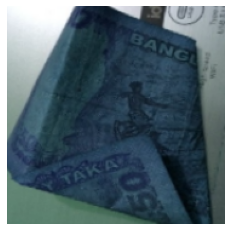

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [53]:
num_classes = 12

#layers.Conv2d(16 filters, filter size(3x3), padding, activation function )
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    layers.Dropout(0.2),
    
    #Dense network
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

cnn.compile(optimizer = 'adam',
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics = ['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
90/90 [==============================] - 115s 720ms/step - loss: 2.0450 - accuracy: 0.2545
Epoch 2/20
90/90 [==============================] - 66s 732ms/step - loss: 1.5820 - accuracy: 0.4474
Epoch 3/20
90/90 [==============================] - 64s 707ms/step - loss: 1.3177 - accuracy: 0.5442
Epoch 4/20
90/90 [==============================] - 64s 710ms/step - loss: 1.2138 - accuracy: 0.5738
Epoch 5/20
90/90 [==============================] - 64s 714ms/step - loss: 1.0841 - accuracy: 0.6118
Epoch 6/20
90/90 [==============================] - 64s 715ms/step - loss: 0.9968 - accuracy: 0.6598
Epoch 7/20
90/90 [==============================] - 64s 706ms/step - loss: 0.9345 - accuracy: 0.6731
Epoch 8/20
90/90 [==============================] - 63s 701ms/step - loss: 0.9225 - accuracy: 0.6859
Epoch 9/20
90/90 [==============================] - 63s 701ms/step - loss: 0.8049 - accuracy: 0.7183
Epoch 10/20
90/90 [==============================] - 63s 701ms/step - loss: 0.7576 - accur

In [54]:
cnn.evaluate(X_test_scaled, y_test)

30/30 [==============================] - 6s 173ms/step - loss: 1.0779 - accuracy: 0.7077


[1.0779451131820679, 0.7077244520187378]